In [1]:
import scipy.io as sio
from scipy import signal
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error as mse
import os
import numpy as np

from sklearn import preprocessing
from tftb.processing import Scalogram
from tftb.generators import fmconst
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
current = sio.loadmat('../../datasets/CS2018_12_14/Current.mat')
voltage = sio.loadmat('../../datasets/CS2018_12_14/Voltage.mat')
stator_plus = sio.loadmat('../../datasets/CS2018_12_14/StatorPuls.mat')
speed = sio.loadmat('../../datasets/CS2018_12_14/Speed.mat')
torque = sio.loadmat('../../datasets/CS2018_12_14/Torque.mat')

In [3]:
dataset = np.hstack((voltage['Voltage'], stator_plus['StatorPuls'], speed['Speed'], current['Current'], torque['Torque']))


In [4]:
dataset_scaled = np.copy(dataset)

In [5]:
current1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current1_scaler.fit(dataset_scaled[:,4:5])

current2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current2_scaler.fit(dataset_scaled[:,5:6])

torque_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
torque_scaler.fit(dataset_scaled[:,6:7])

voltage1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
voltage1_scaler.fit(dataset_scaled[:,0:1])

voltage2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
voltage2_scaler.fit(dataset_scaled[:,1:2])

statorpuls_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
statorpuls_scaler.fit(dataset_scaled[:,2:3])

speed_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
speed_scaler.fit(dataset_scaled[:,3:4])

MinMaxScaler(copy=True, feature_range=[0, 1])

In [12]:
# id_res = np.load('../../results/model_encdec_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current1_lr_0.001_batch_size_128_epochs_2000.npy')
# iq_res = np.load('../../results/model_encdec1_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current2_lr_0.001_batch_size_128_epochs_2000.npy')
# t_res = np.load('../../results/model_encdec1_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Torque_lr_0.001_batch_size_128_epochs_2000.npy')

# id_res = np.load('../../results/model_encdec_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current1_lr_0.001_batch_size_128_epochs_200.npy')
# iq_res = np.load('../../results/model_encdec_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current2_lr_0.001_batch_size_128_epochs_200.npy')
# t_res = np.load('../../results/model_encdec_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Torque_lr_0.001_batch_size_128_epochs_200.npy')

id_res = np.load('../../results/model_encdec_bilstm_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current1_lr_0.001_batch_size_128_epochs_200.npy')
iq_res = np.load('../../results/model_encdec_bilstm_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current2_lr_0.001_batch_size_128_epochs_200.npy')
t_res = np.load('../../results/model_encdec_bilstm_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Torque_lr_0.001_batch_size_128_epochs_200.npy')

id_res = np.reshape(id_res, (2,id_res.shape[1]))
iq_res = np.reshape(iq_res, (2,iq_res.shape[1]))
t_res = np.reshape(t_res, (2,t_res.shape[1]))

In [13]:
id_pred = current1_scaler.inverse_transform(id_res[0,:].reshape(-1,1)).flatten()
id_true = current1_scaler.inverse_transform(id_res[1,:].reshape(-1,1)).flatten()

iq_pred = current2_scaler.inverse_transform(iq_res[0,:].reshape(-1,1)).flatten()
iq_true = current2_scaler.inverse_transform(iq_res[1,:].reshape(-1,1)).flatten()

t_pred = torque_scaler.inverse_transform(t_res[0,:].reshape(-1,1)).flatten()
t_true = torque_scaler.inverse_transform(t_res[1,:].reshape(-1,1)).flatten()

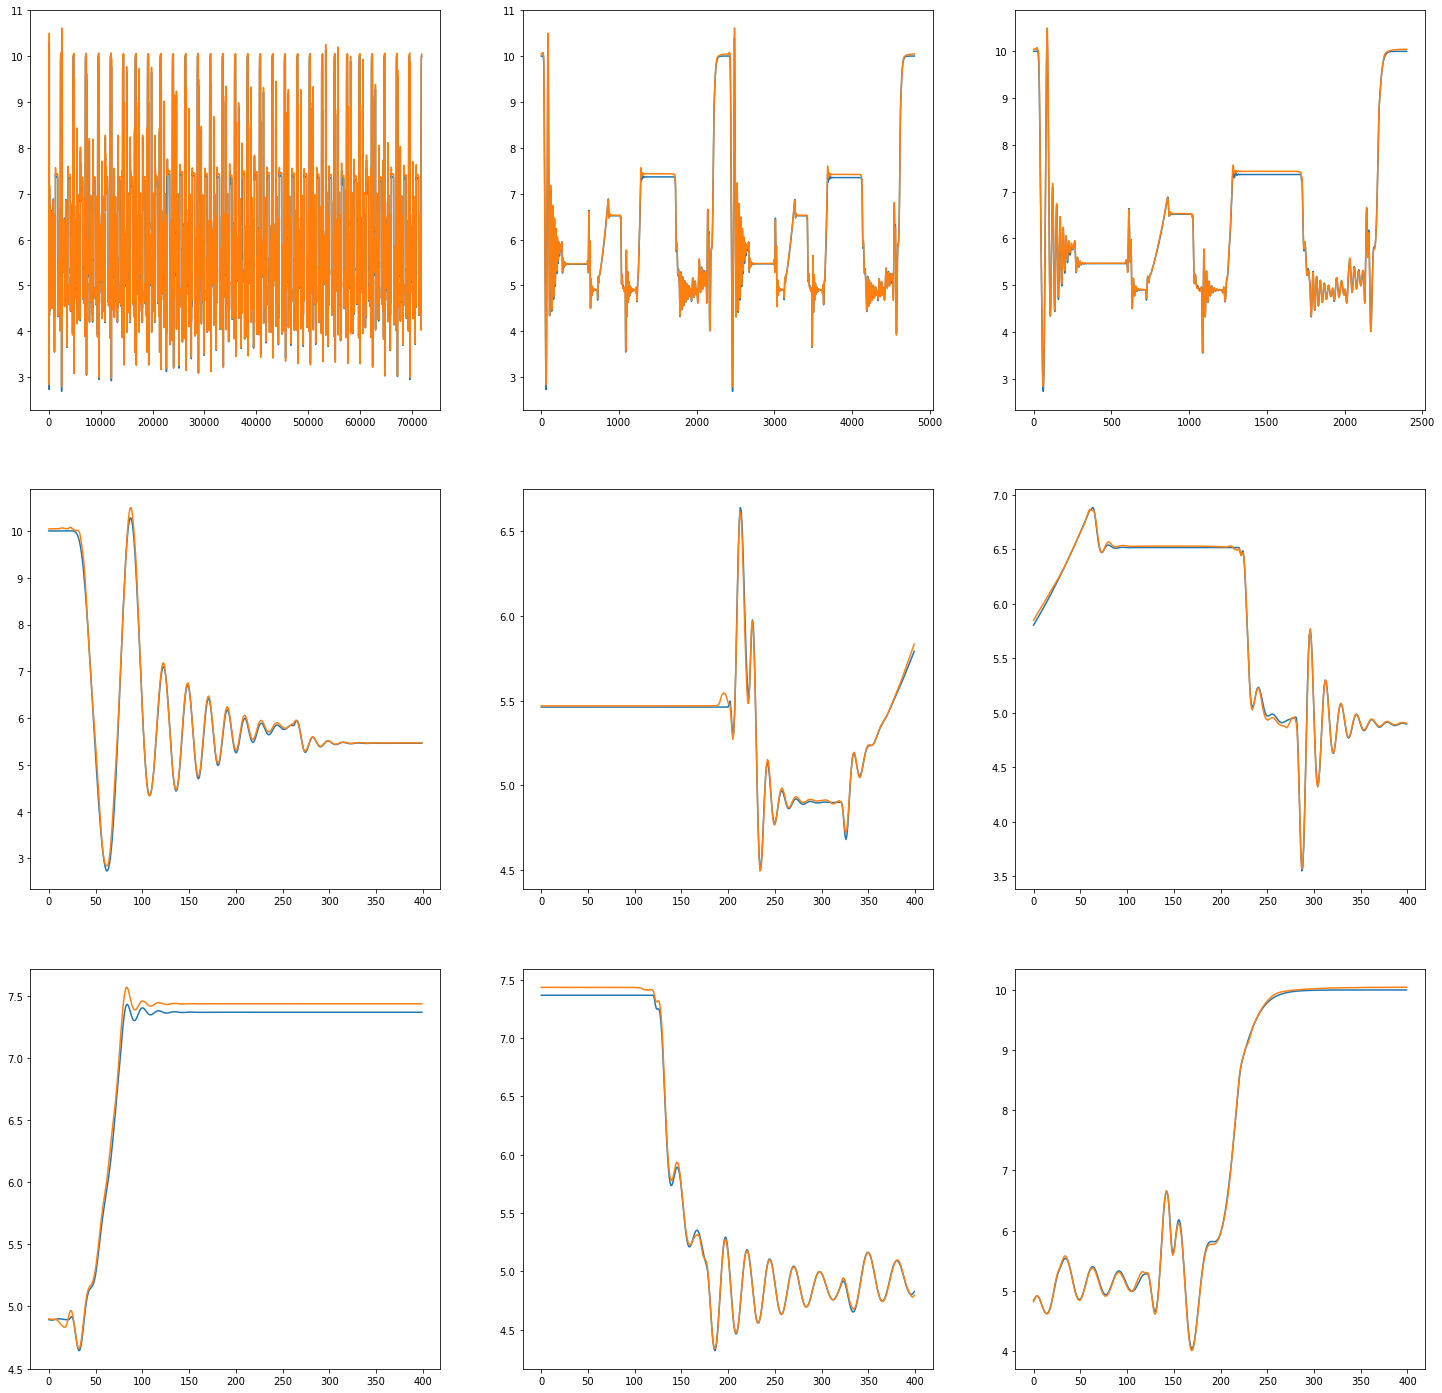

In [14]:
f = plt.figure(figsize=(25,25))

f.add_subplot(3,3,1)
plt.plot(id_true[:])
plt.plot(id_pred[:])

f.add_subplot(3,3,2)
plt.plot(id_true[:int(24/0.005)])
plt.plot(id_pred[:int(24/0.005)])

f.add_subplot(3,3,3)
plt.plot(id_true[:int(12/0.005)])
plt.plot(id_pred[:int(12/0.005)])

f.add_subplot(3,3,4)
plt.plot(id_true[:int(2/0.005)])
plt.plot(id_pred[:int(2/0.005)])

f.add_subplot(3,3,5)
plt.plot(id_true[int(2/0.005):int(4/0.005)])
plt.plot(id_pred[int(2/0.005):int(4/0.005)])

f.add_subplot(3,3,6)
plt.plot(id_true[int(4/0.005):int(6/0.005)])
plt.plot(id_pred[int(4/0.005):int(6/0.005)])

f.add_subplot(3,3,7)
plt.plot(id_true[int(6/0.005):int(8/0.005)])
plt.plot(id_pred[int(6/0.005):int(8/0.005)])

f.add_subplot(3,3,8)
plt.plot(id_true[int(8/0.005):int(10/0.005)])
plt.plot(id_pred[int(8/0.005):int(10/0.005)])

f.add_subplot(3,3,9)
plt.plot(id_true[int(10/0.005):int(12/0.005)])
plt.plot(id_pred[int(10/0.005):int(12/0.005)])

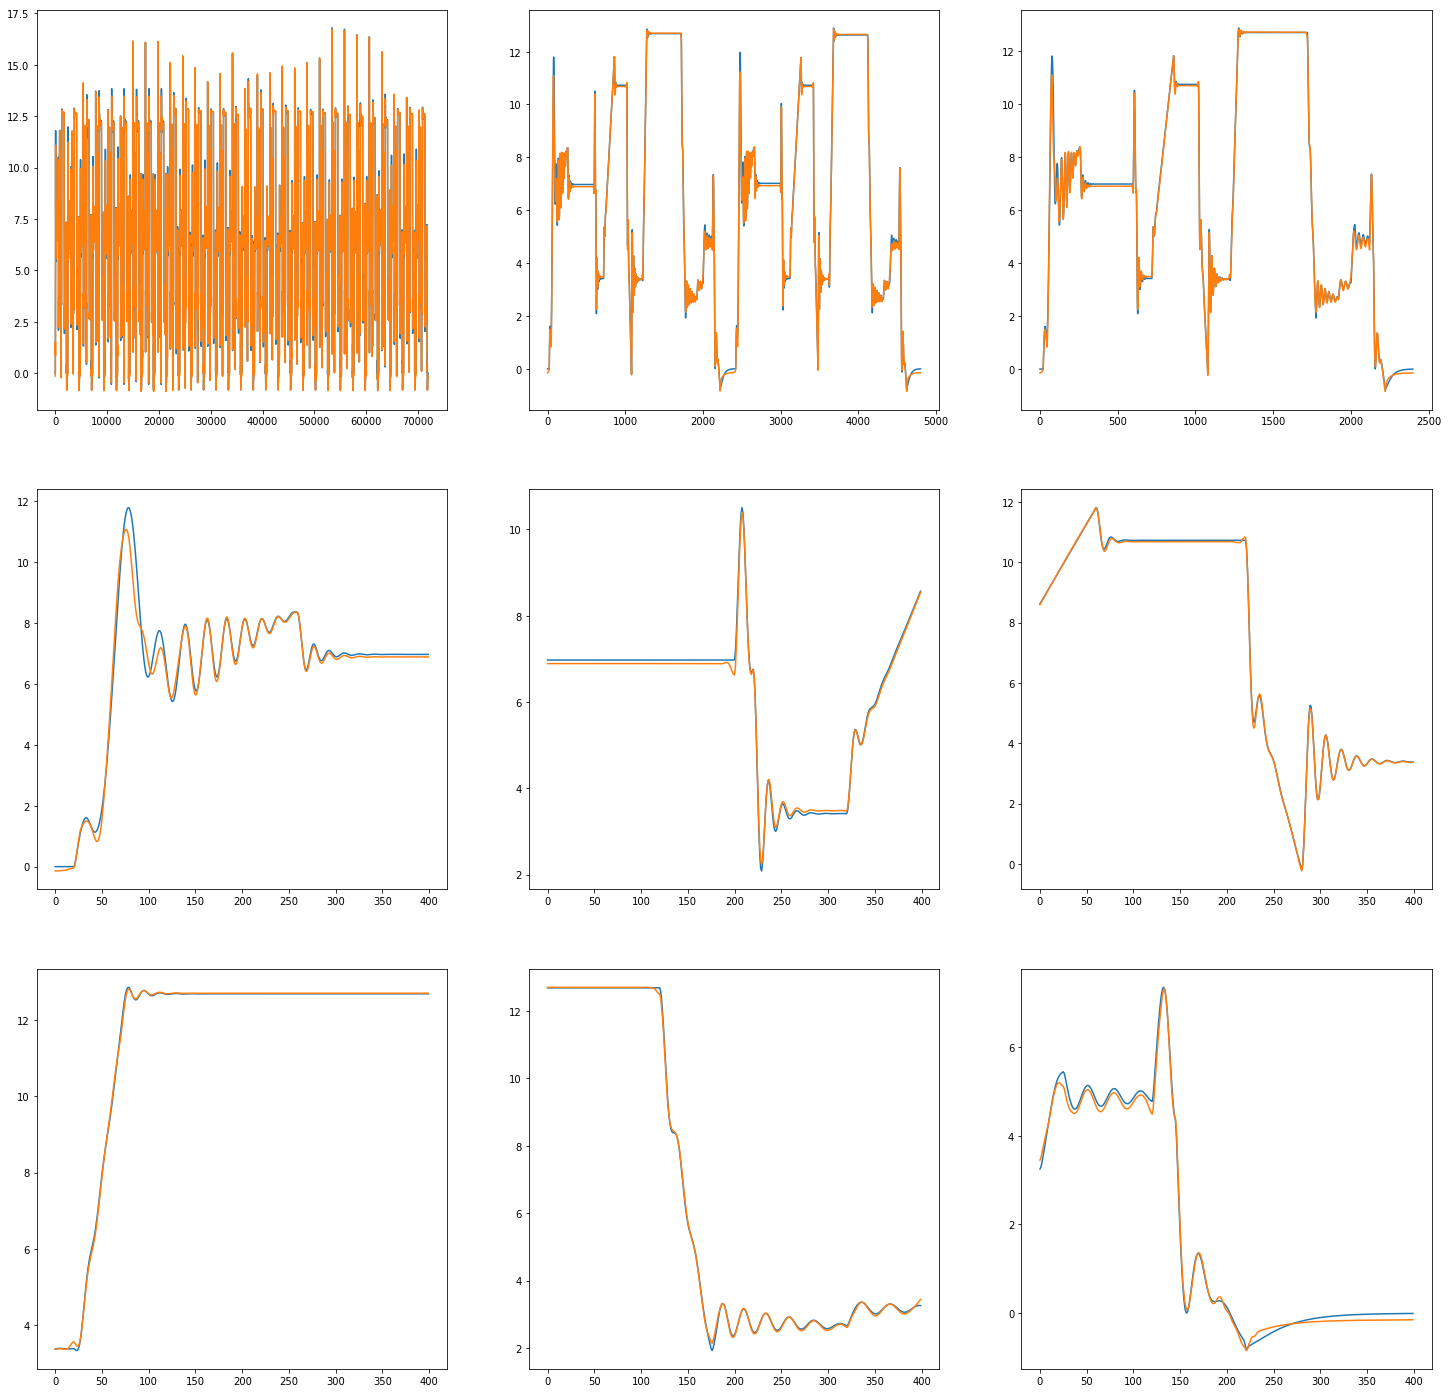

In [15]:
f = plt.figure(figsize=(25,25))

f.add_subplot(3,3,1)
plt.plot(iq_true[:])
plt.plot(iq_pred[:])

f.add_subplot(3,3,2)
plt.plot(iq_true[:int(24/0.005)])
plt.plot(iq_pred[:int(24/0.005)])

f.add_subplot(3,3,3)
plt.plot(iq_true[:int(12/0.005)])
plt.plot(iq_pred[:int(12/0.005)])

f.add_subplot(3,3,4)
plt.plot(iq_true[:int(2/0.005)])
plt.plot(iq_pred[:int(2/0.005)])

f.add_subplot(3,3,5)
plt.plot(iq_true[int(2/0.005):int(4/0.005)])
plt.plot(iq_pred[int(2/0.005):int(4/0.005)])

f.add_subplot(3,3,6)
plt.plot(iq_true[int(4/0.005):int(6/0.005)])
plt.plot(iq_pred[int(4/0.005):int(6/0.005)])

f.add_subplot(3,3,7)
plt.plot(iq_true[int(6/0.005):int(8/0.005)])
plt.plot(iq_pred[int(6/0.005):int(8/0.005)])

f.add_subplot(3,3,8)
plt.plot(iq_true[int(8/0.005):int(10/0.005)])
plt.plot(iq_pred[int(8/0.005):int(10/0.005)])

f.add_subplot(3,3,9)
plt.plot(iq_true[int(10/0.005):int(12/0.005)])
plt.plot(iq_pred[int(10/0.005):int(12/0.005)])

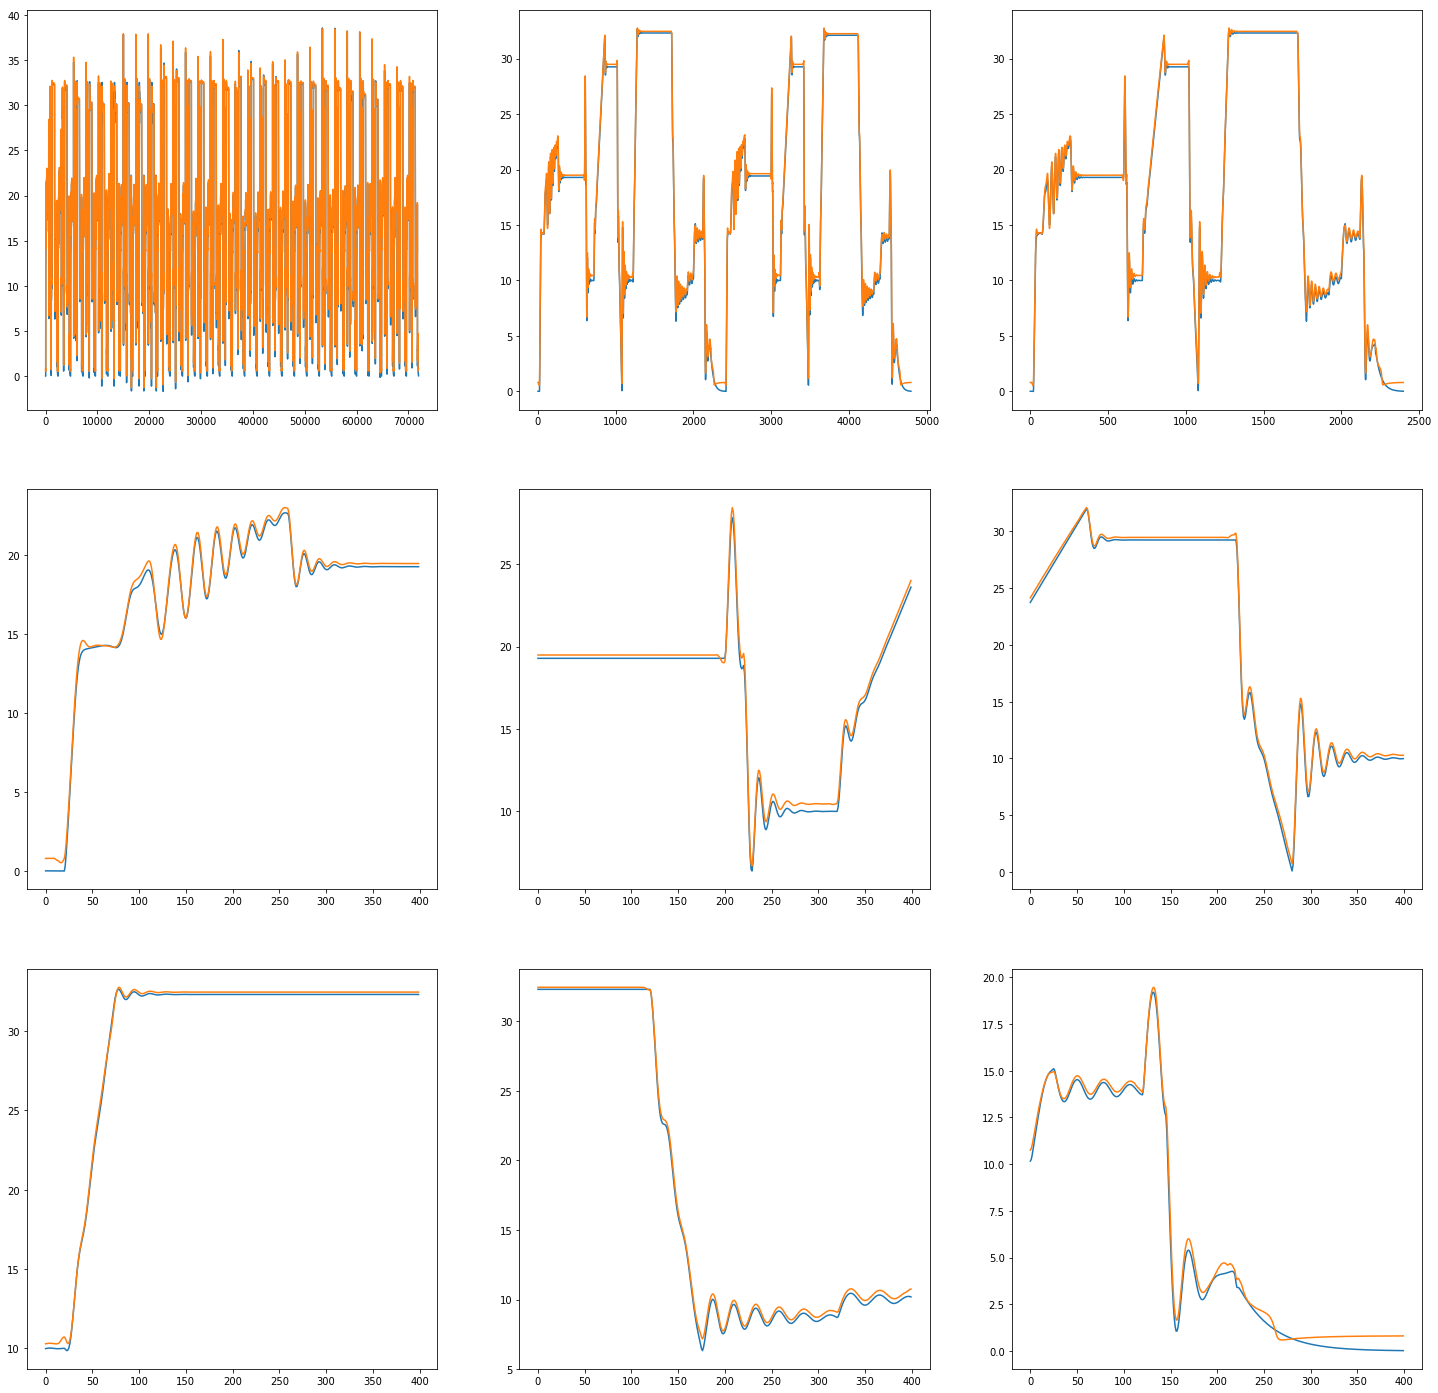

In [16]:
f = plt.figure(figsize=(25,25))

f.add_subplot(3,3,1)
plt.plot(t_true[:])
plt.plot(t_pred[:])

f.add_subplot(3,3,2)
plt.plot(t_true[:int(24/0.005)])
plt.plot(t_pred[:int(24/0.005)])

f.add_subplot(3,3,3)
plt.plot(t_true[:int(12/0.005)])
plt.plot(t_pred[:int(12/0.005)])

f.add_subplot(3,3,4)
plt.plot(t_true[:int(2/0.005)])
plt.plot(t_pred[:int(2/0.005)])

f.add_subplot(3,3,5)
plt.plot(t_true[int(2/0.005):int(4/0.005)])
plt.plot(t_pred[int(2/0.005):int(4/0.005)])

f.add_subplot(3,3,6)
plt.plot(t_true[int(4/0.005):int(6/0.005)])
plt.plot(t_pred[int(4/0.005):int(6/0.005)])

f.add_subplot(3,3,7)
plt.plot(t_true[int(6/0.005):int(8/0.005)])
plt.plot(t_pred[int(6/0.005):int(8/0.005)])

f.add_subplot(3,3,8)
plt.plot(t_true[int(8/0.005):int(10/0.005)])
plt.plot(t_pred[int(8/0.005):int(10/0.005)])

f.add_subplot(3,3,9)
plt.plot(t_true[int(10/0.005):int(12/0.005)])
plt.plot(t_pred[int(10/0.005):int(12/0.005)])